[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/llm-from-scratch/blob/main/torch_from_scratch/numpy_vs_torch.ipynb)

References:
- https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# Goal: fit the $y = sin(x)$ function with a 3rd order polynomial

## with `numpy`

In [12]:
%%time

import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
losses = []

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    losses.append(loss)
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 2839.2371739240675
199 1956.3231670170403
299 1350.3101124712116
399 933.8836757022169
499 647.41130578778
599 450.1191361357597
699 314.0958871399649
799 220.21326478337127
899 155.34716902017703
999 110.48278801738917
1099 79.42095128858736
1199 57.89394633289467
1299 42.96050069869763
1399 32.59131191490791
1499 25.384787550916887
1599 20.371866196783994
1699 16.881851638282097
1799 14.45008405098067
1899 12.754331774447973
1999 11.570921747772527
Result: y = 0.05067598348317383 + 0.8358541421680393 x + -0.008742450402852485 x^2 + -0.09035943771974832 x^3
CPU times: user 284 ms, sys: 6.8 ms, total: 291 ms
Wall time: 299 ms


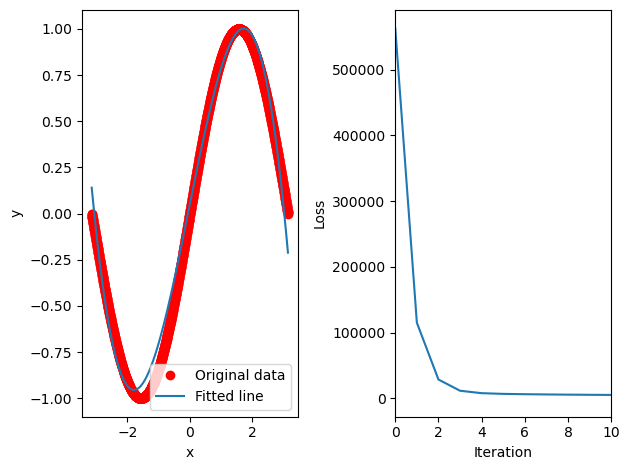

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

# compare the fitted line with the original data
axes[0].plot(x, y, 'ro', label='Original data')
axes[0].plot(x, a + b * x + c * x ** 2 + d * x ** 3, label='Fitted line')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# visualize the loss evolution
axes[1].plot(range(2000), losses)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Loss')
axes[1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

## with `PyTorch` generic implementation

In [21]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)
losses = []

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    losses.append(loss)
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1831.26806640625
199 1215.2515869140625
299 807.5213623046875
399 537.6319580078125
499 358.97125244140625
599 240.69296264648438
699 162.38311767578125
799 110.53116607666016
899 76.19464111328125
999 53.454837799072266
1099 38.39362335205078
1199 28.41680908203125
1299 21.807342529296875
1399 17.428062438964844
1499 14.52607250213623
1599 12.602804183959961
1699 11.327921867370605
1799 10.48272705078125
1899 9.922271728515625
1999 9.550575256347656
Result: y = -0.00673515722155571 + 0.8311522603034973 x + 0.0011619261931627989 x^2 + -0.08969063311815262 x^3


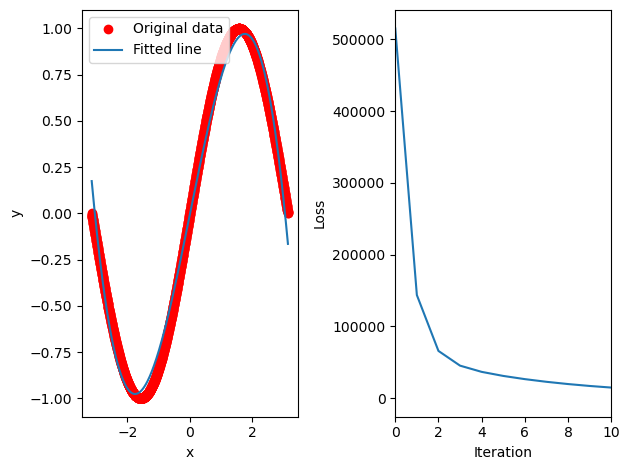

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

# compare the fitted line with the original data
axes[0].plot(x, y, 'ro', label='Original data')
axes[0].plot(x, a + b * x + c * x ** 2 + d * x ** 3, label='Fitted line')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# visualize the loss evolution
axes[1].plot(range(2000), losses)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Loss')
axes[1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

## with `PyTorch`'s autograd

In [36]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)
losses = []

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    losses.append(loss.detach().numpy())
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1502.8843994140625
199 996.840087890625
299 662.198486328125
399 440.90167236328125
499 294.5585632324219
599 197.7816925048828
699 133.7828369140625
799 91.45970916748047
899 63.471092224121094
999 44.96169662475586
1099 32.72088623046875
1199 24.62574005126953
1299 19.272157669067383
1399 15.7316312789917
1499 13.390206336975098
1599 11.841634750366211
1699 10.817508697509766
1799 10.140167236328125
1899 9.692209243774414
1999 9.395915031433105
Result: y = 0.001554735004901886 + 0.8333988189697266 x + -0.00026821799110621214 x^2 + -0.09001018851995468 x^3


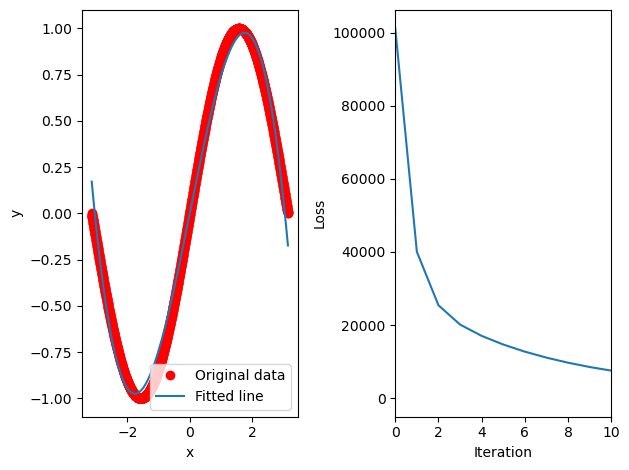

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

# compare the fitted line with the original data
axes[0].plot(x, y, 'ro', label='Original data')

# We need to detach the tensor from the computation graph to convert it to a numpy array
axes[0].plot(x.detach().numpy(), a.detach().numpy() + b.detach().numpy() * x.detach().numpy() + c.detach().numpy() * x.detach().numpy() ** 2 + d.detach().numpy() * x.detach().numpy() ** 3, label='Fitted line')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# visualize the loss evolution
axes[1].plot(range(2000), losses)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Loss')
axes[1].set_xlim([0, 10])

plt.tight_layout()
plt.show()